# Initial Libraries

In [1]:
import pandas as pd 
import numpy as np 
import math
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

# Data Import and Cleaning

In [2]:
# Import the basic data

data_base = pd.read_csv('Mobile Device Data for Assignment 2.csv')  
data_base.head()

,Model,Release Date,Release Year,Model ID,RAM Capacity (Mb),Storage (Mb),CPU Clock (MHz),Display Diagonal (in),Display Width(px),Display Length(px),Width (mm),Length (mm),Depth (mm),Volume (cubic cm),Mass (grams),Pixel Density (per inch)
0,Psion Organiser II LZ 64,1/01/1989,1989,1,0.000000,0.000000,0.000000,0.050360,0.000000,0.000000,0.369714,0.118852,0.146889,0.059332,0.044181,0.000000
1,Hewlett-Packard 95LX (HP Jaguar),1/04/1991,1991,2,0.000214,0.000015,0.002230,0.223022,0.056911,0.047619,0.416098,0.147541,0.127646,0.065799,0.053879,0.030793
2,Psion Series 3,1/06/1991,1991,3,0.000092,0.000015,0.001895,0.187050,0.056911,0.023810,0.432469,0.147541,0.101988,0.056634,0.044181,0.035336
3,Hewlett-Packard 95LX 1MB RAM (HP Jaguar),1/01/1992,1992,4,0.000458,0.000015,0.002230,0.223022,0.056911,0.047619,0.416098,0.147541,0.127646,0.065799,0.053879,0.030793
4,Psion Series 3a,1/03/1993,1993,5,0.000214,0.000015,0.003386,0.258993,0.154472,0.063492,0.432469,0.147541,0.101988,0.056634,0.046336,0.129985


In [3]:
data_base["Aspect Ratio"] =  data_base["Length (mm)"] / data_base["Width (mm)"]
data_base["Display Aspect Ratio"] =  data_base["Display Length(px)"] / data_base["Display Width(px)"]
data_base["Storage/RAM Ratio"] =  data_base["Storage (Mb)"] / data_base["RAM Capacity (Mb)"]

In [4]:
data_year = data_base.groupby(['Release Year']).mean()
data_year.head()

C:\Users\Minerva\AppData\Local\Temp\ipykernel_20536\3159991391.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_year = data_base.groupby(['Release Year']).mean()


,Model ID,RAM Capacity (Mb),Storage (Mb),CPU Clock (MHz),Display Diagonal (in),Display Width(px),Display Length(px),Width (mm),Length (mm),Depth (mm),Volume (cubic cm),Mass (grams),Pixel Density (per inch),Aspect Ratio,Display Aspect Ratio,Storage/RAM Ratio
Release Year,,,,,,,,,,,,,,,,
1989,1.0,0.000000,0.000000,0.000000,0.050360,0.000000,0.000000,0.369714,0.118852,0.146889,0.059332,0.044181,0.000000,0.321472,NaN,NaN
1991,2.5,0.000153,0.000015,0.002062,0.205036,0.056911,0.035714,0.424284,0.147541,0.114817,0.061217,0.049030,0.033064,0.347871,0.627551,0.120105
1992,4.0,0.000458,0.000015,0.002230,0.223022,0.056911,0.047619,0.416098,0.147541,0.127646,0.065799,0.053879,0.030793,0.354582,0.836735,0.033641
1993,6.0,0.000376,0.000015,0.003462,0.249400,0.197832,0.089947,0.421555,0.147541,0.119093,0.062744,0.055675,0.193253,0.350108,0.450354,0.046456
1994,10.0,0.000580,0.000045,0.007129,0.238849,0.121951,0.130159,0.335989,0.407049,0.115074,0.081618,0.076750,0.147552,1.382465,1.749912,0.128623


(0.0, 0.2)

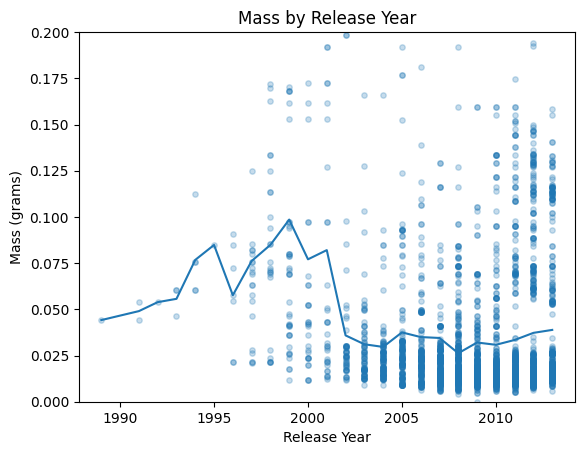

In [5]:
plt.scatter(data_base['Release Year'], data_base['Mass (grams)'], alpha=0.25, s=15)
plt.plot(data_year['Mass (grams)'])

plt.ylabel('Mass (grams)')
plt.xlabel('Release Year')
plt.title("Mass by Release Year")

plt.ylim([0,0.2])

(0.0, 1.0)

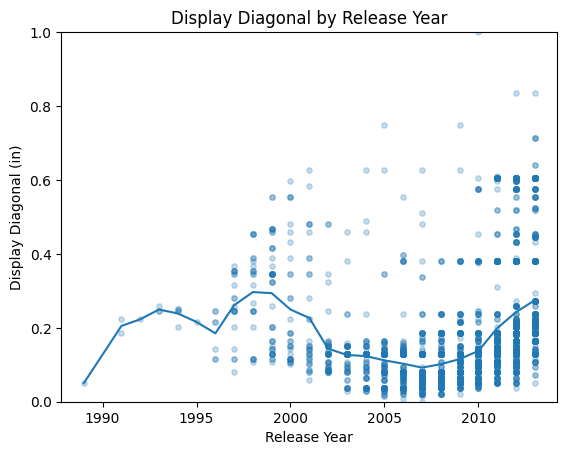

In [6]:
plt.scatter(data_base['Release Year'], data_base['Display Diagonal (in)'], alpha=0.25, s=15)
plt.plot(data_year['Display Diagonal (in)'])

plt.ylabel('Display Diagonal (in)')
plt.xlabel('Release Year')
plt.title("Display Diagonal by Release Year")

plt.ylim([0, 1])

(0.0, 4.0)

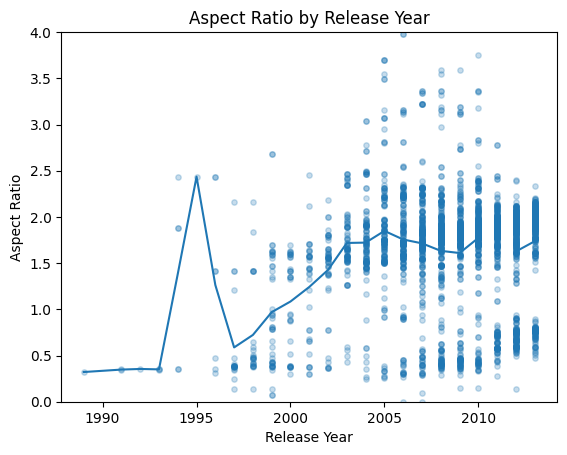

In [7]:
plt.scatter(data_base['Release Year'], data_base['Aspect Ratio'], alpha=0.25, s=15)
plt.plot(data_year['Aspect Ratio'])

plt.ylabel('Aspect Ratio')
plt.xlabel('Release Year')
plt.title("Aspect Ratio by Release Year")

plt.ylim([0, 4])

(0.0, 1.0)

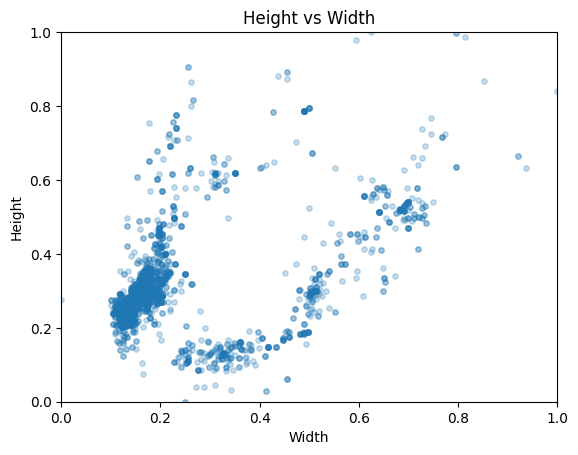

In [8]:
plt.scatter(data_base['Width (mm)'], data_base['Length (mm)'], alpha=0.25, s=15)

plt.ylabel('Height')
plt.xlabel('Width')
plt.title("Height vs Width")

plt.xlim([0, 1])
plt.ylim([0, 1])

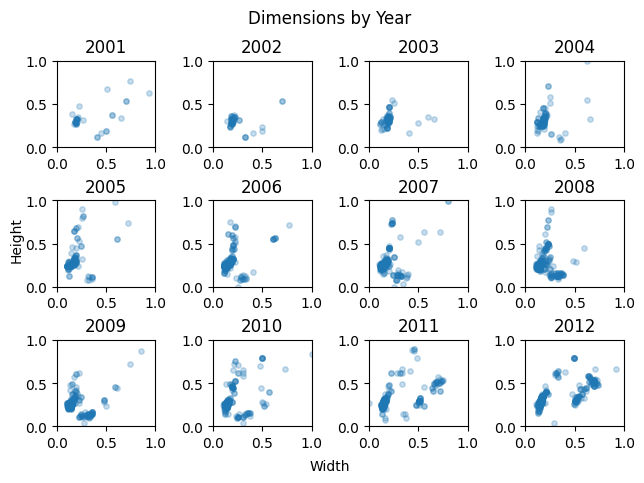

In [9]:
wid = 4
hei = 3
fig, axs = plt.subplots(hei, wid)
for x in range(wid):
    for y in range(hei):
        year = max(data_base['Release Year']) - wid*hei + (wid*y + x)
        data_year = data_base[data_base['Release Year'] == year]
        axs[y, x].scatter(data_year['Width (mm)'], data_year['Length (mm)'], alpha=0.25, s=15)
        axs[y, x].set_title(str(year))
        axs[y, x].set_xlim([0, 1])
        axs[y, x].set_ylim([0, 1])
        
fig.tight_layout(h_pad=0.5,rect=[0, 0.03, 1, 0.95])
fig.suptitle("Dimensions by Year")
fig.text(0.5, 0.02, 'Width', ha='center')
fig.text(0, 0.5, 'Height', va='center', rotation='vertical')

plt.rcParams['figure.figsize'] = [5, 2.5]

plt.show()

Define the observed data types

In [10]:
data_type = data_base
data_type["Type"] = "Null"

# Palmtops and Laptops are wider than they are tall. They are distinguished from each other by their size
palm_width_thresh = 0.45
data_type.loc[ np.logical_and(data_type['Aspect Ratio'] < 1, data_type['Width (mm)'] < palm_width_thresh), ['Type']] = 'Palmtop'
data_type.loc[ np.logical_and(data_type['Aspect Ratio'] < 1, data_type['Width (mm)'] > palm_width_thresh), ['Type']] = 'Laptop'

# Phones tend to be taller than they are wide. Dumb phones tend to have a display with a very different aspect ratio to the phone in general
display_ratio_thresh = 0.2
data_type.loc[ data_type['Aspect Ratio'] > 1, ['Type'] ] = 'Phone'
data_type.loc[ np.logical_and(data_type['Aspect Ratio'] <= data_type['Display Aspect Ratio'] + display_ratio_thresh,data_type["Type"] == "Phone"), ['Type'] ] = 'Smart Phone'
data_type.loc[ np.logical_and(data_type['Aspect Ratio'] > data_type['Display Aspect Ratio'] + display_ratio_thresh,data_type["Type"] == "Phone"), ['Type'] ] = 'Dumb Phone'

# PDAs also tended to have similar characteristics to smartphones, but they can be differentiated since proper smartphones only existed after 2007
data_type.loc[ np.logical_and(data_type['Release Year'] < 2007,data_type["Type"] == "Smart Phone"), ['Type'] ] = 'PDA'

In [11]:
data_type[np.logical_and(data_type['Type'] == "PDA", data_type['Release Year'] < 2015)]

,Model,Release Date,Release Year,Model ID,RAM Capacity (Mb),Storage (Mb),CPU Clock (MHz),Display Diagonal (in),Display Width(px),Display Length(px),Width (mm),Length (mm),Depth (mm),Volume (cubic cm),Mass (grams),Pixel Density (per inch),Aspect Ratio,Display Aspect Ratio,Storage/RAM Ratio,Type
7,Apple Newton H1000 (Apple OMP),1/08/1993,1994,8,0.000275,0.000064,0.009548,0.251799,0.056911,0.150794,0.294134,0.554098,0.083387,0.076655,0.075431,0.088592,1.883832,2.649660,0.234830,PDA
8,Apple Newton MessagePad 100,1/08/1993,1994,9,0.000275,0.000064,0.009548,0.251799,0.056911,0.150794,0.294134,0.554098,0.083387,0.076655,0.075431,0.088592,1.883832,2.649660,0.234830,PDA
11,Apple Newton MessagePad 110 (Apple Lindy),1/03/1994,1994,12,0.000458,0.000064,0.009548,0.201439,0.056911,0.142857,0.259482,0.631967,0.153303,0.123183,0.112198,0.110803,2.435499,2.510204,0.140898,PDA
12,Apple Newton MessagePad 120,1/10/1994,1995,13,0.000946,0.000064,0.009548,0.215827,0.056911,0.142857,0.259482,0.631967,0.153303,0.123183,0.084825,0.101716,2.435499,2.510204,0.068176,PDA
14,Apple Newton MessagePad 120 8MB,1/11/1995,1996,15,0.000946,0.000130,0.009548,0.215827,0.056911,0.142857,0.259482,0.631967,0.153303,0.123183,0.084825,0.101716,2.435499,2.510204,0.137471,PDA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,Nokia N72,1/06/2006,2006,772,0.031220,0.000785,0.109594,0.028777,0.030894,0.087302,0.127422,0.245082,0.100706,0.006809,0.013793,0.308430,1.923395,2.825815,0.025159,PDA
772,Samsung SGH-Z600,1/06/2006,2006,773,0.031220,0.002096,0.095588,0.028777,0.030894,0.087302,0.113233,0.163934,0.111610,0.011691,0.011853,0.412670,1.447758,2.825815,0.067145,PDA
773,Sony Ericsson M600 / M600i (SE Lily),1/06/2006,2006,774,0.031220,0.002096,0.103591,0.064748,0.056911,0.142857,0.129604,0.237705,0.057088,0.009121,0.011207,0.276376,1.834081,2.510204,0.067145,PDA
776,UBiQUiO 401,1/06/2006,2006,777,0.031220,0.001048,0.207639,0.057554,0.056911,0.142857,0.128240,0.245902,0.114817,0.020534,0.020043,0.291772,1.917510,2.510204,0.033556,PDA


In [12]:
data_colour = data_type
data_colour["Colour"] = "grey"
data_colour.loc[ data_colour['Type'] == "Dumb Phone", ['Colour'] ] = "darkorange"
data_colour.loc[ data_colour['Type'] == "Smart Phone", ['Colour'] ] = "red"
data_colour.loc[ data_colour['Type'] == "PDA", ['Colour'] ] = "green"
data_colour.loc[ data_colour['Type'] == "Palmtop", ['Colour'] ] = "turquoise"
data_colour.loc[ data_colour['Type'] == "Laptop", ['Colour'] ] = "blue"

(0.0, 1.0)

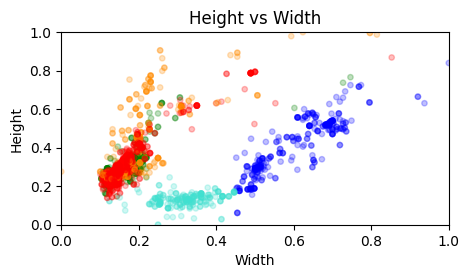

In [13]:
plt.scatter(data_colour['Width (mm)'], data_colour['Length (mm)'], alpha=0.25, s=15, c=data_colour['Colour'])

plt.ylabel('Height')
plt.xlabel('Width')
plt.title("Height vs Width")

plt.xlim([0, 1])
plt.ylim([0, 1])

(0.0, 4.0)

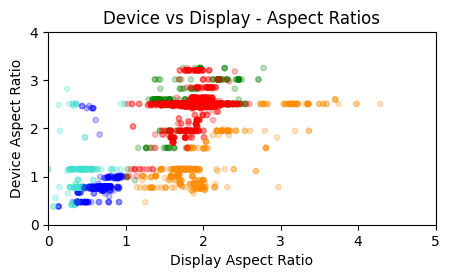

In [14]:
plt.scatter(data_colour['Aspect Ratio'], data_colour['Display Aspect Ratio'], alpha=0.25, s=15, c=data_colour['Colour'])

plt.xlabel('Display Aspect Ratio')
plt.ylabel('Device Aspect Ratio')
plt.title("Device vs Display - Aspect Ratios")

plt.xlim([0, 5])
plt.ylim([0, 4])

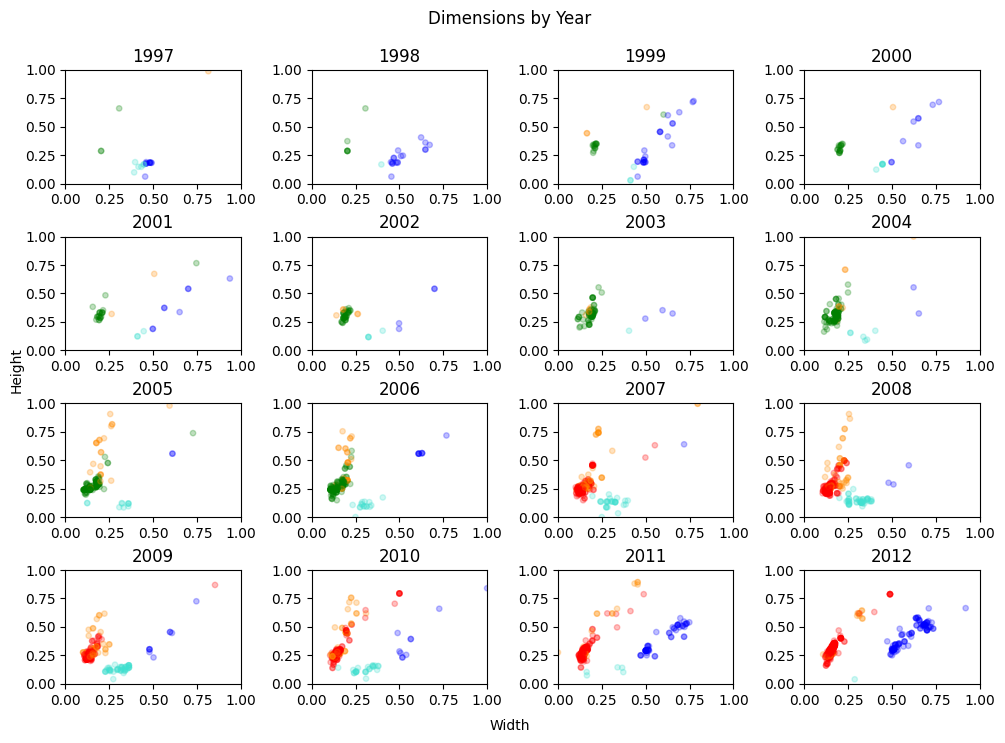

In [17]:
wid = 4
hei = 4
fig, axs = plt.subplots(hei, wid)
for x in range(wid):
    for y in range(hei):
        year = max(data_colour['Release Year']) - wid*hei + (wid*y + x)
        data_year = data_colour[data_colour['Release Year'] == year]
        axs[y, x].scatter(data_year['Width (mm)'], data_year['Length (mm)'], alpha=0.25, s=15, c=data_year['Colour'])
        axs[y, x].set_title(str(year))
        axs[y, x].set_xlim([0, 1])
        axs[y, x].set_ylim([0, 1])
        
fig.tight_layout(h_pad=0.5,rect=[0, 0.03, 1, 0.95])
fig.suptitle("Dimensions by Year")
fig.text(0.5, 0.02, 'Width', ha='center')
fig.text(0, 0.5, 'Height', va='center', rotation='vertical')

plt.rcParams['figure.figsize'] = [10, 7.5]

plt.show()

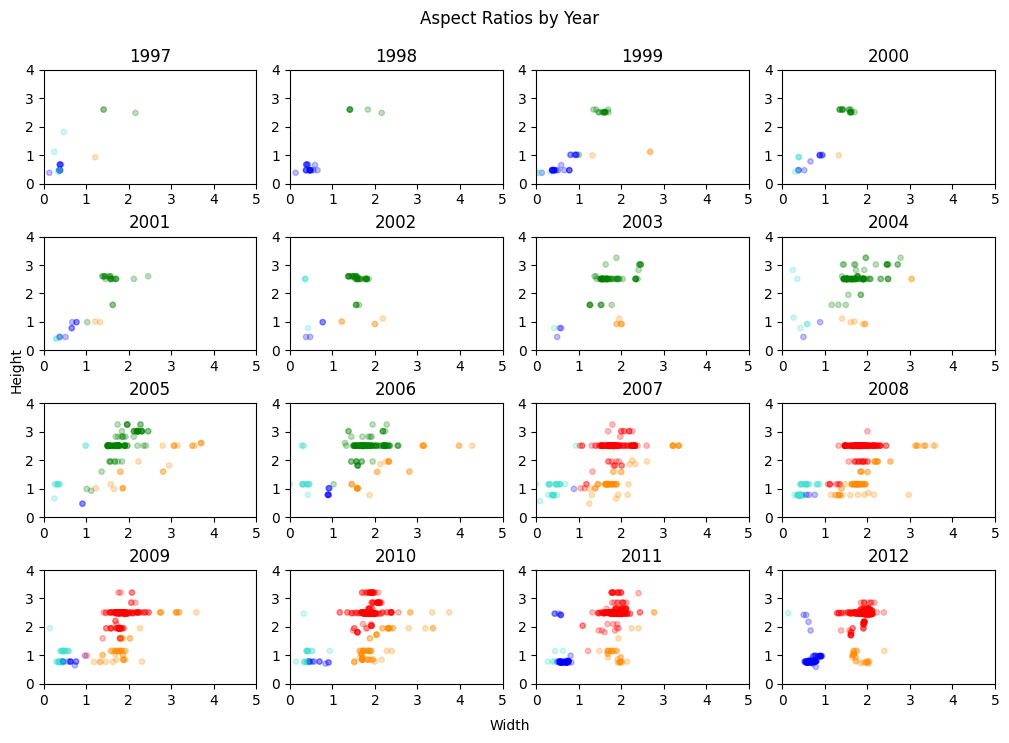

In [16]:
wid = 4
hei = 4
fig, axs = plt.subplots(hei, wid)
for x in range(wid):
    for y in range(hei):
        year = max(data_colour['Release Year']) - wid*hei + (wid*y + x)
        data_year = data_colour[data_colour['Release Year'] == year]
        axs[y, x].scatter(data_year['Aspect Ratio'], data_year['Display Aspect Ratio'], alpha=0.25, s=15, c=data_year['Colour'])
        axs[y, x].set_title(str(year))
        axs[y, x].set_xlim([0, 5])
        axs[y, x].set_ylim([0, 4])
        
fig.tight_layout(h_pad=0.5,rect=[0, 0.03, 1, 0.95])
fig.suptitle("Aspect Ratios by Year")
fig.text(0.5, 0.02, 'Width', ha='center')
fig.text(0, 0.5, 'Height', va='center', rotation='vertical')

plt.rcParams['figure.figsize'] = [10, 7.5]

plt.show()